In [1]:
# Reddit data analysis task starter.
import html
import json
import string
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import *
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# First collect the data in json-file (follow reddit_collect_data.ipynb); specify file name here
fjson = 'raw_post_comment_data.json'

In [3]:
# read json file with collected posts and comments
# https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files
with open(fjson) as file:
    data = json.load(file)
len(data)

50

In [4]:
# data record example
data[0]

{'id': 'vdez5x',
 'title': 'Monthly /r/ebikes promo thread',
 'text': 'This  thread is for anyone selling ebike products or services. Our posting  guidelines do not apply here; sellers can directly link to product  pages, provide updates and coupon codes, advertise ebay auctions and  crowdfunding campaigns and do other promotional activities without  worrying that it could be seen as spam.\n\nFront page posts are still acceptable for sellers to post actual news, articles, reviews, blog posts, videos and pictures. But if it is clearly marketing then it probably belongs here. Regular readers can of course create new threads to ask about anything posted in here. \n\nNote for [/r/ebikes](https://www.reddit.com/r/ebikes)  readers: Posts here do not constitute endorsement by anyone, use your best judgement and ask around to find out what is right for you.',
 'comments_lev1': ["RadPowerBikes is currently running a promo for the RadRover 6 Plus, $300 off plus 3 free accessories, no code needed

In [5]:
# create pandas dataframe from post titles
# https://stackoverflow.com/a/43175477
df_posts = pd.DataFrame([p['title'] for p in data], columns=['title'])
df_posts

,title
0,Monthly /r/ebikes promo thread
1,Bike friendly neighborhoods start at the local...
2,Someone tried to steal my rad rover. Lil 15 do...
3,72v surron feels insane to ride
4,How can you use an ebike if everyones saying d...
5,Afternoon happy hour.
6,Bike shop in SoCal told me to fully drain the ...
7,Finally both up and running. Old Ruckus gets n...
8,my first flex! (my first bike purchase) Avento...
9,Bike theft in broad daylight. (Good reason for...


In [6]:
# add columns from other data fields: combine comment and sub-comment text
df_posts['post_id'] = [p['id'] for p in data]
df_posts['text'] = [p['text'] for p in data]
df_posts['comments_lev1'] = [' '.join(p['comments_lev1']) for p in data]
df_posts['comments_lev2'] = [' '.join(p['comments_lev2']) for p in data]
df_posts

,title,post_id,text,comments_lev1,comments_lev2
0,Monthly /r/ebikes promo thread,vdez5x,This thread is for anyone selling ebike produ...,RadPowerBikes is currently running a promo for...,
1,Bike friendly neighborhoods start at the local...,qa1nxo,1. Transportation infrastructure policy is lar...,Started grassroots advocating a little over tw...,I’d love to hear your story and learn from you...
2,Someone tried to steal my rad rover. Lil 15 do...,ver26d,,"If you bought an expensive ebike, it might be ...","thats fair, but bike theft has not been an iss..."
3,72v surron feels insane to ride,vek466,,KEEP IT IFF OUR TRAILS FUCKING CHEATER\n\njklo...,"Trail builder here. I don't hate ebikes, they ..."
4,How can you use an ebike if everyones saying d...,vebvcd,Been considering getting an ebike soon and dit...,"Get insurance, it's cheaper than you think, an...",Are you in the US? What company do you use for...
5,Afternoon happy hour.,ventao,,Truly a gorgeous view Very nice! May I get a n...,And surprisingly pleasant patio seating for th...
6,Bike shop in SoCal told me to fully drain the ...,venudf,Told me if your ride ends at like 5-10% just r...,This is what you do with nickel cadmium batter...,"No, they do not. I got a refund and left a 1 s..."
7,Finally both up and running. Old Ruckus gets n...,veuqso,,,
8,my first flex! (my first bike purchase) Avento...,veukfj,,,
9,Bike theft in broad daylight. (Good reason for...,vers07,,I’m not one to condone violence but I don’t th...,Yeah other people were like it’s not worth it ...


In [7]:
# text cleaning function: see prior class modules
stop_words = set(stopwords.words('english'))

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [8]:
# add clean text column with combined comments of both levels
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_posts['text_clean'] = (df_posts['text'] + df_posts['comments_lev1'] + df_posts['comments_lev1']).apply(text_cleanup)
df_posts

,title,post_id,text,comments_lev1,comments_lev2,text_clean
0,Monthly /r/ebikes promo thread,vdez5x,This thread is for anyone selling ebike produ...,RadPowerBikes is currently running a promo for...,,thread anyone selling ebike products services ...
1,Bike friendly neighborhoods start at the local...,qa1nxo,1. Transportation infrastructure policy is lar...,Started grassroots advocating a little over tw...,I’d love to hear your story and learn from you...,transportation infrastructure policy largely d...
2,Someone tried to steal my rad rover. Lil 15 do...,ver26d,,"If you bought an expensive ebike, it might be ...","thats fair, but bike theft has not been an iss...",bought expensive ebike might better invest fun...
3,72v surron feels insane to ride,vek466,,KEEP IT IFF OUR TRAILS FUCKING CHEATER\n\njklo...,"Trail builder here. I don't hate ebikes, they ...",keep iff trails fucking cheater jklol know arm...
4,How can you use an ebike if everyones saying d...,vebvcd,Been considering getting an ebike soon and dit...,"Get insurance, it's cheaper than you think, an...",Are you in the US? What company do you use for...,considering getting ebike soon ditching car ma...
5,Afternoon happy hour.,ventao,,Truly a gorgeous view Very nice! May I get a n...,And surprisingly pleasant patio seating for th...,truly gorgeous view nice may get name black bi...
6,Bike shop in SoCal told me to fully drain the ...,venudf,Told me if your ride ends at like 5-10% just r...,This is what you do with nickel cadmium batter...,"No, they do not. I got a refund and left a 1 s...",told ride ends like ride around circles dies w...
7,Finally both up and running. Old Ruckus gets n...,veuqso,,,,
8,my first flex! (my first bike purchase) Avento...,veukfj,,,,
9,Bike theft in broad daylight. (Good reason for...,vers07,,I’m not one to condone violence but I don’t th...,Yeah other people were like it’s not worth it ...,im one condone violence dont think could watch...


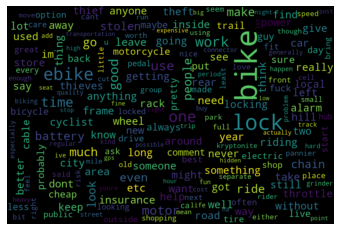

In [9]:
# most common keywords
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
text_combined = ' '.join(df_posts['text_clean'])
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(text_combined)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [10]:
# extract keyword counts
# https://stackoverflow.com/questions/60234036/python-word-count-from-wordcloud
kwords = WordCloud().process_text(text_combined)
kwords

{'thread': 2,
 'anyone': 40,
 'selling': 5,
 'ebike': 161,
 'posting': 3,
 'guidelines': 1,
 'apply': 1,
 'directly': 3,
 'link': 11,
 'product': 4,
 'provide': 5,
 'advertise': 1,
 'ebay': 1,
 'auctions': 1,
 'crowdfunding': 1,
 'campaigns': 1,
 'promotional': 1,
 'activities': 1,
 'without': 22,
 'worrying': 1,
 'seen': 13,
 'spam': 1,
 'front': 15,
 'page': 2,
 'still': 43,
 'acceptable': 1,
 'post': 15,
 'actual': 5,
 'articles': 1,
 'reviews': 3,
 'blog': 1,
 'pictures': 3,
 'clearly': 1,
 'marketing': 1,
 'probably': 30,
 'regular': 18,
 'readers': 2,
 'course': 5,
 'create': 1,
 'new': 32,
 'ask': 6,
 'anything': 35,
 'posted': 1,
 'note': 1,
 'constitute': 1,
 'endorsement': 1,
 'use': 103,
 'best': 17,
 'judgement': 1,
 'around': 47,
 'find': 35,
 'right': 21,
 'currently': 11,
 'running': 6,
 'plus': 14,
 'accessories': 2,
 'code': 9,
 'needed': 7,
 'purchased': 5,
 'radmini4': 4,
 'model': 3,
 'love': 23,
 'put': 32,
 'bike': 498,
 'cart': 4,
 'start': 28,
 'process': 2,
 'a

In [11]:
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
df_kwords

,count
keyword,
thread,2
anyone,40
selling,5
ebike,161
posting,3
...,...
feature armed,2
armed lift,2
lift difficulty,2


<AxesSubplot:xlabel='keyword'>

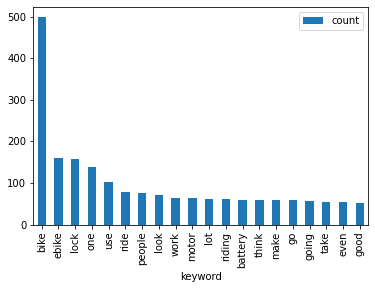

In [12]:
# plot a bar chart with the top keywords
%matplotlib inline
df_kwords.sort_values(by='count', ascending=False).head(20).plot.bar()

In [13]:
# NLTK collocations search (words occuring together): bigrams
# https://www.nltk.org/howto/collocations.html
# http://www.nltk.org/api/nltk.html#nltk.util.bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_documents([d.split() for d in df_posts['text_clean']])

In [14]:
# filter out bigrams occurring less than three times in the combined text
bigram_finder.apply_freq_filter(3)

In [15]:
# list of bigrams with their frequencies
bigram_freq = list(bigram_finder.ngram_fd.items())
bigram_freq

[(('could', 'seen'), 3),
 (('6', 'plus'), 4),
 (('use', 'link'), 4),
 (('link', 'get'), 4),
 (('get', '50'), 6),
 (('browser', 'extension'), 4),
 (('back', 'purchase'), 4),
 (('ended', 'getting'), 3),
 (('another', 'option'), 4),
 (('feel', 'free'), 4),
 (('free', 'dm'), 4),
 (('dm', 'questions'), 4),
 (('rad', 'power'), 4),
 (('work', 'bring'), 4),
 (('also', 'use'), 10),
 (('rad', 'bikes'), 4),
 (('local', 'level'), 3),
 (('number', 'people'), 3),
 (('make', 'difference'), 3),
 (('even', 'ca'), 3),
 (('bike', 'lanes'), 3),
 (('two', 'years'), 4),
 (('get', 'bike'), 12),
 (('bike', 'rack'), 22),
 (('riding', 'bikes'), 4),
 (('couple', 'days'), 4),
 (('light', 'poles'), 4),
 (('road', 'bike'), 8),
 (('also', 'give'), 4),
 (('walk', 'bike'), 4),
 (('great', 'bike'), 6),
 (('bike', 'path'), 6),
 (('bus', 'line'), 6),
 (('people', 'using'), 4),
 (('used', 'lot'), 4),
 (('bike', 'lane'), 4),
 (('bus', 'lanes'), 4),
 (('riding', 'bike'), 4),
 (('would', 'like'), 5),
 (('local', 'businesses'

In [16]:
# collect into a pandas dataframe
df_freq = pd.DataFrame([(' '.join(k), v) for k,v in bigram_freq], columns=['keyphrase', 'count'])
df_freq.sort_values(by='count', ascending=False, inplace=True)
df_freq.set_index('keyphrase', inplace = True)
df_freq

,count
keyphrase,
leave bike,26
bike rack,22
chain lock,21
get stolen,20
looks like,19
...,...
looking bike,3
time unfortunately,3
used one,3


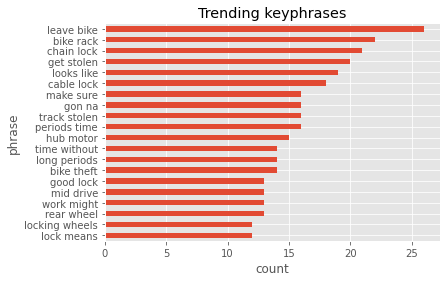

In [17]:
plt.style.use('ggplot')

# render a horizontal bar graph
df_freq.head(20).sort_values(by='count').plot(kind = 'barh')
plt.title('Trending keyphrases')
plt.ylabel('phrase')
plt.xlabel('count')
plt.legend().set_visible(False)
plt.show()